# Imports

In [6]:
import datetime as dt
import os
import pandas as pd
import numpy as np

from tqdm import tqdm

# Plotly : 인터랙티브 그래프를 그려주는 패키지
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as po

# Load Dataset

In [2]:
data_dir = 'D:/OneDrive - 연세대학교 (Yonsei University)/Projects/Yonsei_TELab/003_도로상충_210517-/2차년도_2022/27_남양주영업소_드론영상분석/서울방향/01_density_by_target_LOS_concated_lanechange'
### 데이터 들어있는 폴더 : 

In [3]:
save_dir = 'D:/OneDrive - 연세대학교 (Yonsei University)/Projects/Yonsei_TELab/003_도로상충_210517-/2차년도_2022/35_22-9차 회의 준비/01_영업소 부스별 궤적 그리기/서울방향'
### 데이터 저장할 폴더 : 설정하면됨

In [4]:
file_list = os.listdir(data_dir)

# Filtering & Draw Trj

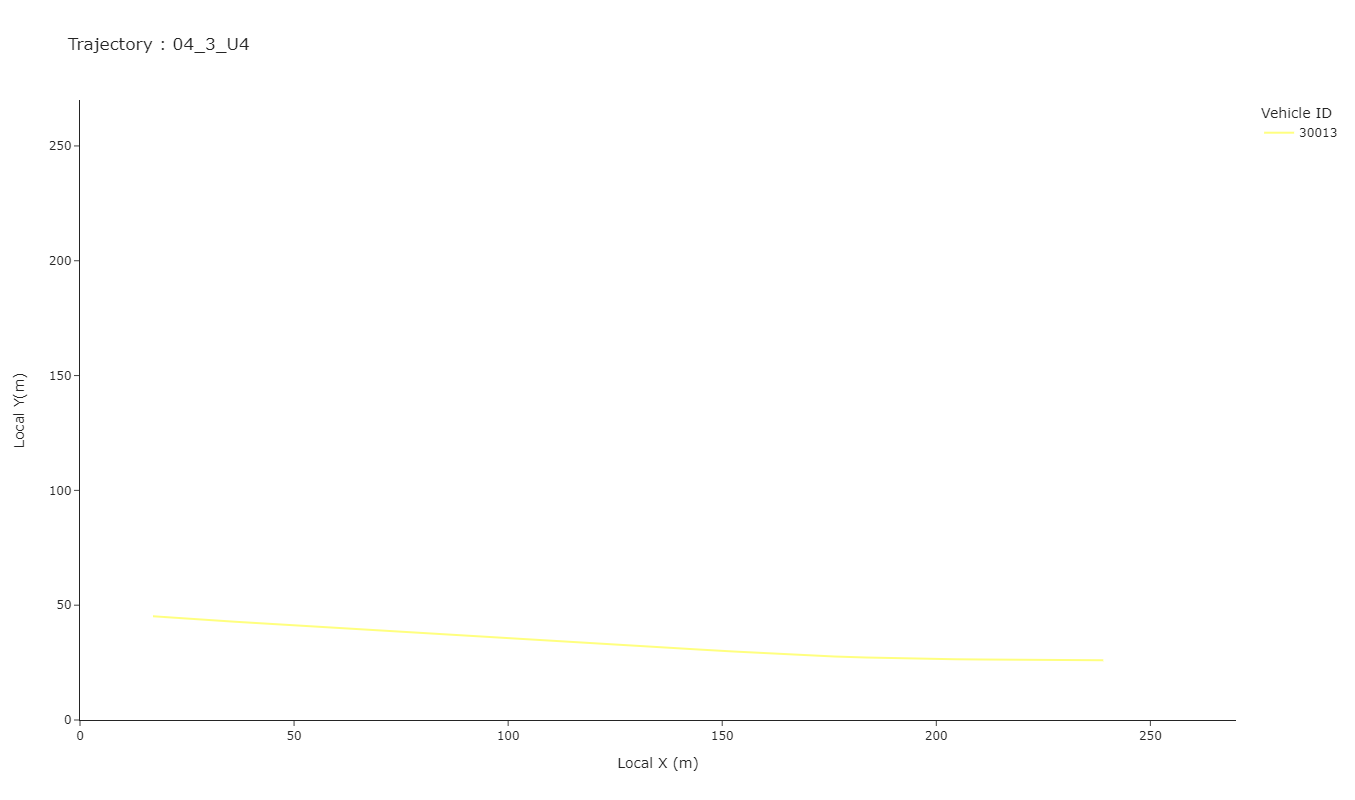

In [8]:
for file in file_list:
    file_path = os.path.join(data_dir, file) # 파일리스트의 파일별 경로 설정
    
    df = pd.read_csv(file_path)
    
    booth_list = df['Lane_99'].unique()
    
    for booth in booth_list: # 영업소 각 종착 부스별로
        df_booth = df[df['Lane_99'] == booth] # 각 부스별로 들어가는 차량들을 필터링하기
        
        df_booth
        
        fig = px.line(df_booth, x = 'Local X (m)', y = 'Local Y(m)', 
                      color = 'Vehicle ID',
                      title = f'Trajectory : {file[-10:-6]}_{booth}',
                      template = 'simple_white',
                      width = 800,
                      height = 800)
        
        fig.update_xaxes(range = [0, 270])
        fig.update_yaxes(range = [0, 270])
        
        fig.update_layout({
            'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
            'paper_bgcolor' : 'rgba(0, 0, 0, 0)'
        })
        
        fig.update_traces(line_color = 'yellow', opacity = 0.5)
    
        save_html_name = f'{file[-10:-6]}_{booth}.html'
        save_html_path = os.path.join(save_dir, save_html_name)
    
        po.write_html(fig, file = save_html_path) # html Plotly 파일 저장
        
        save_png_name = f'{file[-10:-6]}_{booth}.png'
        save_png_path = os.path.join(save_dir, save_png_name)        
        
        fig.write_image(save_png_path)
    
    else:
        pass
    
fig.show()